In [50]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format ='retina'

import titanic_tools

In [51]:
traindf = pd.read_csv('train.csv').set_index('PassengerId',)
testdf = pd.read_csv('test.csv').set_index('PassengerId')
df = pd.concat([traindf, testdf], axis=0, sort=False)

In [52]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [53]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df.Title.replace('Ms','Miss')
df['Title'] = df.Title.replace('Mlle','Miss')
df['Title'] = df.Title.replace('Mme','Mrs')
df['Title'] = df.Title.apply(titanic_tools.replace_not_important_with_others)
df.drop('Name',axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


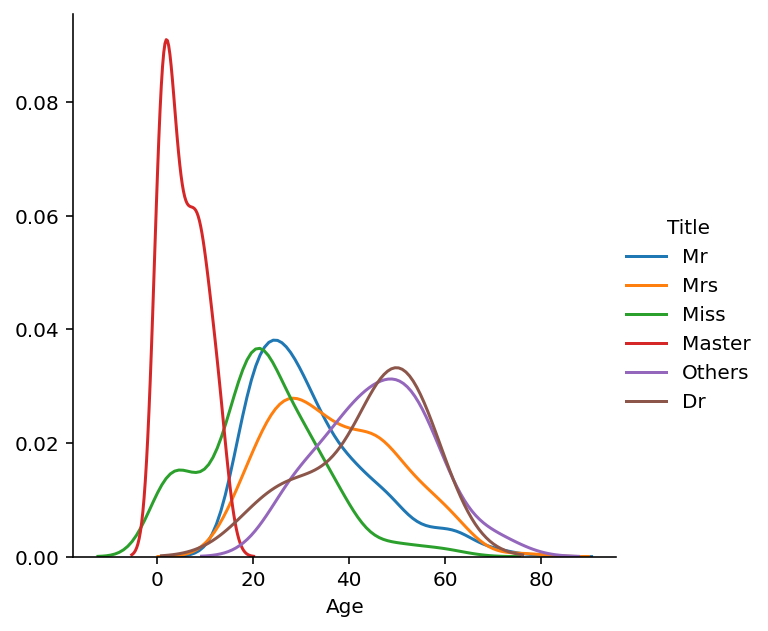

In [54]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
facet = sns.FacetGrid(data = df, hue = "Title", legend_out=True, height = 4.5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

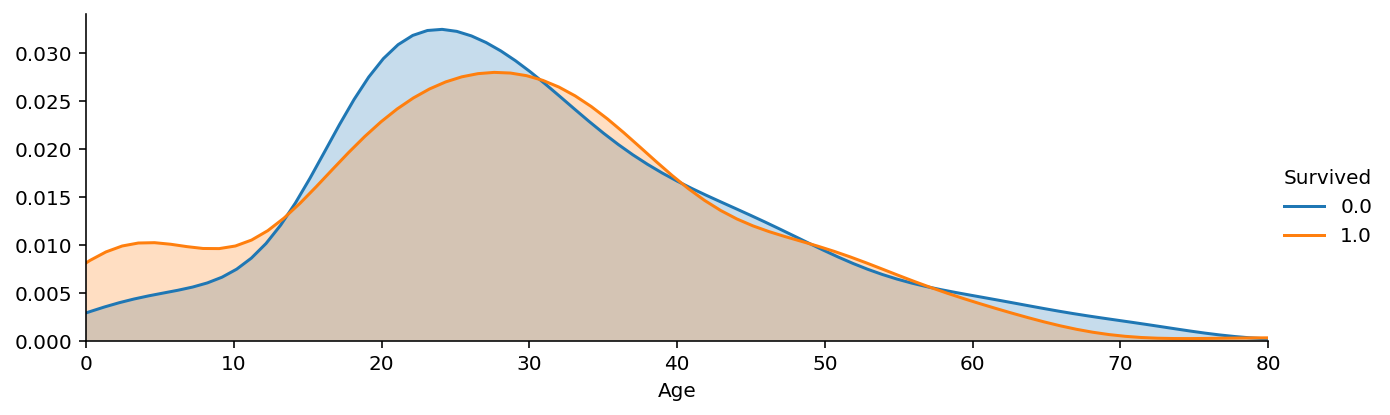

In [55]:
facet = sns.FacetGrid(df, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend();

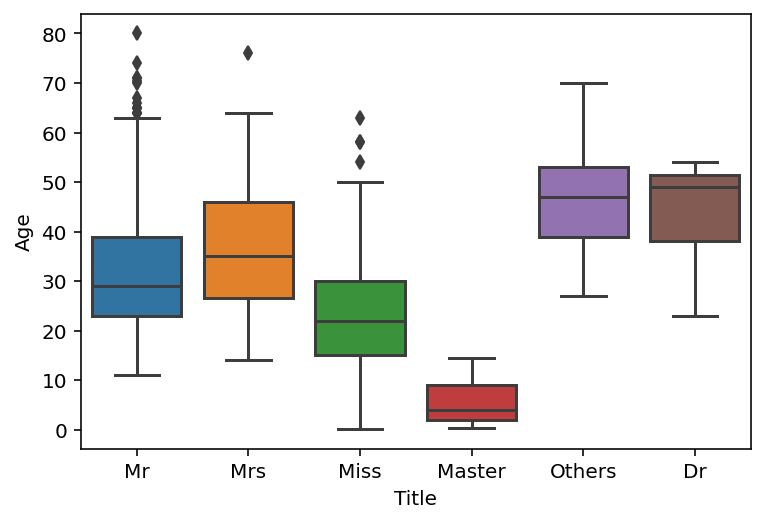

In [56]:
sns.boxplot(data = df, x = "Title", y = "Age");

In [57]:
df.groupby(df.Title).Age.mean()

Title
Dr        43.571429
Master     5.482642
Miss      21.824366
Mr        32.252151
Mrs       36.918129
Others    45.714286
Name: Age, dtype: float64

In [58]:
df[df.Fare.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1044,NaN,3,male,60.5,0,0,3701,NaN,NaN,S,Mr


In [59]:
df.groupby(df.Pclass).Fare.mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

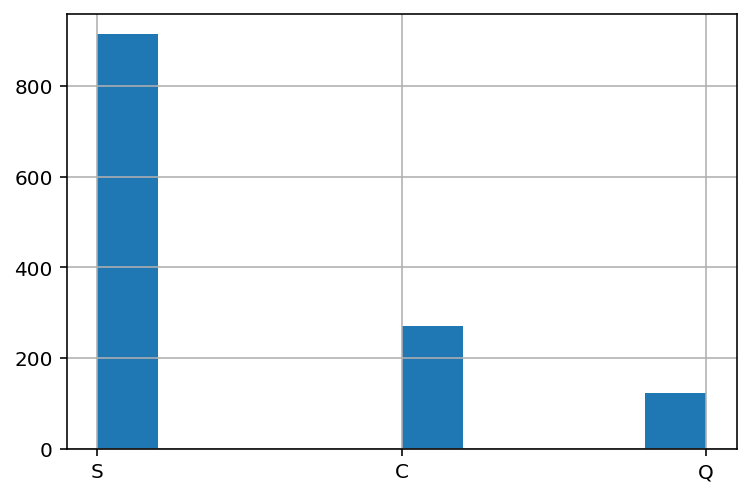

In [60]:
df.Embarked.hist();

In [61]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
62,1.0,1,female,38.0,0,0,113572,80.0,B28,NaN,Miss
830,1.0,1,female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [69]:
df.head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr
6,0.0,3,male,NaN,0,0,330877,8.4583,NaN,Q,Mr
7,0.0,1,male,54.0,0,0,17463,51.8625,E46,S,Mr
8,0.0,3,male,2.0,3,1,349909,21.0750,NaN,S,Master
9,1.0,3,female,27.0,0,2,347742,11.1333,NaN,S,Mrs


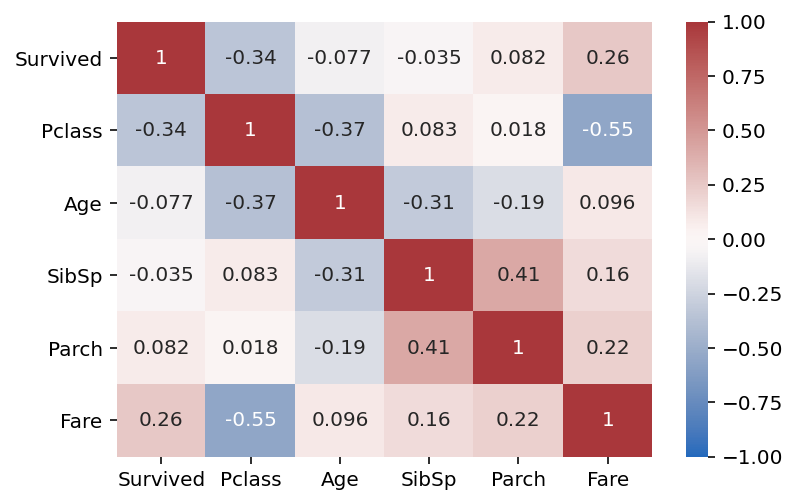

In [63]:
sns.heatmap(traindf.corr(),center=0,vmin=-1, vmax=1,cmap='vlag', annot=True);